### Supermarket Analysis

In [29]:
import pandas as pd
import numpy as np

supAndCon = pd.read_csv("data-conveniencesupermarkets.csv", sep=",", dtype = str)
supAndCon.head(8)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202,40.495759,-80.066508,9,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143,40.545418,-80.194152,9,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202,40.510522,-80.094268,9,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205,41.203322,-77.194525,3,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143,40.553281,-80.109158,8,Convenience Store
5,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137,40.367923,-79.780429,9,Convenience Store
6,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231,40.494177,-80.267208,9,Convenience Store
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207,40.370214,-79.913195,9,Convenience Store


### Access to Food - Supermarkets and Convience Stores in Pittsburgh 

Having access to food is imperative for any healthy community- and with the data provided from the WPRDC we have looked into which neighborhoods have the easiest access to supermarkets and convenience stores. Easiest access to a healthy food involves having the most supermarket options, not just a higher level of convenience stores. 

### List of Zipcodes

In [3]:
print(supAndCon['Zip'].unique())
len(supAndCon['Zip'].unique())

['15202' '15143' '15205' '15137' '15231' '15207' '15101' '15112' '15229'
 '15222' '15210' '15104' '15146' '15132' '15219' '15024' '15208' '15237'
 '15239' '15025' '15120' '15217' '15129' '15014' '15037' '15218' '15214'
 '15236' '15227' '15232' '15108' '15145' '15235' '15035' '15144' '15034'
 '15026' '15131' '15106' '15221' '15241' '15228' '15206' '15065' '15204'
 '15088' '15147' '15223' '16046' '15234' '15090' '15045' '15133' '15212'
 '15084' '15226' '15110' '15116' '15136' '15071' '15044' '15213' '15201'
 '15225' '15220' '15017' '15233' '15086' '15135' '15203' '15224' '15209'
 '15238' '15216' '15215' '15102' '15211' '15122' '15140' '15046' '15139'
 '15142' '15282' '15030' '15057' '15018' '15056' '15127' '15275' '15076'
 nan]


91

There are 91 total zipcodes present in the supermarket and convenience store csv! 

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


### Creating the DataFrame

I narrowed the columns I am using down to the zipcodes and presence of supermarkets and convienence stores only.I counted how many convenience stores and supermarkets were in each zipcode, then made a total list of combining both convenience stores and zipcodes. 

In [19]:
df = pd.DataFrame(supAndCon.iloc[:, np.r_[7,11]])
df
query_mask_CS = supAndCon['Category'] == "Convenience Store"
query_mask_S = supAndCon['Category'] == "Supermarket"

print(query_mask_CS)

0       True
1       True
2       True
3       True
4       True
       ...  
667    False
668    False
669    False
670    False
671    False
Name: Category, Length: 672, dtype: bool


In [8]:
count = df.groupby(['Zip', 'Category']).size().to_frame().reset_index().rename(columns={0:"amount"})
count.sort_values("amount", axis = 0, ascending = False, inplace = True, na_position ='last')
print(count.head(15))
count_total = df.groupby(['Zip']).size().to_frame().reset_index().rename(columns={0:"amounts"})
count_total.sort_values("amounts", axis = 0, ascending = False, inplace = True, na_position ='last')
print(count_total.head(15))

       Zip           Category  amount
135  15237  Convenience Store      18
111  15222  Convenience Store      17
38   15108  Convenience Store      16
57   15136  Convenience Store      16
105  15219  Convenience Store      16
89   15210  Convenience Store      14
69   15146  Convenience Store      14
93   15212  Convenience Store      14
95   15213  Convenience Store      14
109  15221  Convenience Store      13
53   15132  Convenience Store      13
82   15206  Convenience Store      13
133  15236  Convenience Store      12
131  15235  Convenience Store      11
119  15227  Convenience Store      10
      Zip  amounts
83  15237       28
46  15146       22
69  15222       21
35  15132       19
26  15108       19
57  15210       18
66  15219       17
60  15213       17
59  15212       17
38  15136       17
53  15206       17
82  15236       16
81  15235       16
68  15221       16
31  15122       15


### Making a Horizontal Bar Graph

<Figure size 432x288 with 0 Axes>

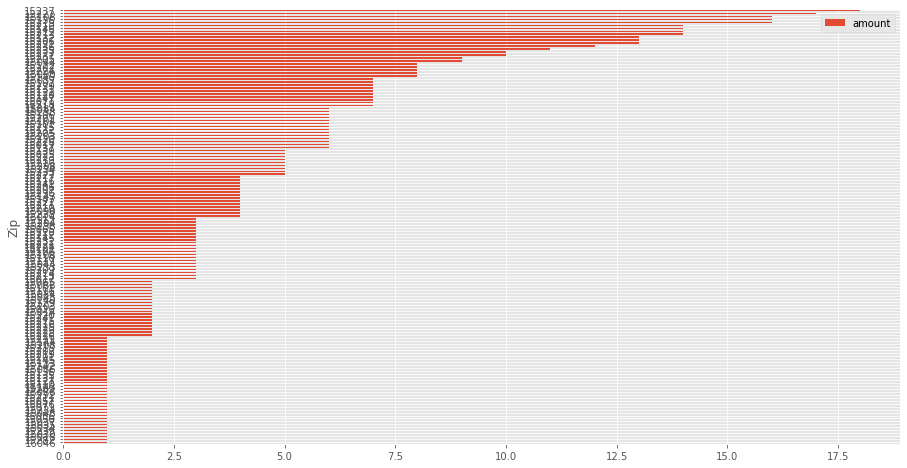

In [10]:
plt.tight_layout()
plt.style.use("ggplot")
chart_values = count[count["amount"] > 0].sort_values('amount')
chart_values.plot.barh(x="Zip",y="amount",figsize=(15,8))
plt.savefig("zipVStores.png")

### Supermarkets vs Convenience Stores

What are the amount of supermarkets compared to convenience stores?

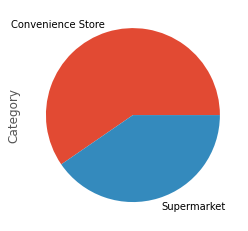

In [11]:
count["Category"].value_counts().sort_index().plot.pie(y='Category', 
                                                  subplots=False, 
                                                  figsize=(8, 4))

Covenience Stores are 76.9% of total shopping options while consist of Supermarkets = 23.1%. 


### Convenience Store and Supermarket Data Conclusion

- 15237 --> Franklin Park, Townships of Ross & McCandless
- 15146 --> Monroeville
- 15222 --> Downtown
- 15132 --> McKeesport
- 15108 --> Coraopolis

The best neighborhoods for convenience of access to a store is Franklin Park and the Townships of Ross and McCandless. Located in the suburbs of Pittsburgh, it's the clear winner. Next is Monroeville followed by downtown, McKeesport and Coraopolis. These neighborhoods have the highest convenience level to acquiring food, as I looked at total counts on accessibility. However, Franklin, Ross and McCandless are clear winners in supermarkets as well, with the highest access to healthy options overall.  